In [1]:
# Import built-in librarires
import os
from os.path import abspath

# Import external librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import local libraries
from src.plot_distribution import plot_distribution

## Load Data

In [2]:
# Load all data
demo = pd.read_csv(abspath("../data/T_demo.csv"))
stage = pd.read_csv(abspath("../data/T_stage.csv"))

# Biomarkers
cre = pd.read_csv(abspath("../data/T_creatinine.csv"))
dbp = pd.read_csv(abspath("../data/T_DBP.csv"))
sbp = pd.read_csv(abspath("../data/T_SBP.csv"))
hgb = pd.read_csv(abspath("../data/T_HGB.csv"))
glu = pd.read_csv(abspath("../data/T_glucose.csv"))
ldl = pd.read_csv(abspath("../data/T_ldl.csv"))

# Medication
meds = pd.read_csv(abspath("../data/T_meds.csv"))

## Check for missing data

In [3]:
# Check for missing data on all tables
print(demo.isna().any())
print(stage.isna().any())

# Biomarkers
print(cre.isna().any())
print(dbp.isna().any())
print(sbp.isna().any())
print(hgb.isna().any())
print(glu.isna().any())
print(ldl.isna().any())

# Meication
print(meds.isna().any())

id        False
race      False
gender    False
age       False
dtype: bool
id                False
Stage_Progress    False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id       False
value    False
time     False
dtype: bool
id              False
drug            False
daily_dosage    False
start_day       False
end_day         False
dtype: bool


## Explore demographics

In [4]:
# Explore the demographics
# For race
print(demo.race.value_counts())
print(demo.race.value_counts()/demo.race.value_counts().sum())

White       226
Unknown      26
Black        24
Asian        17
Hispanic      7
Name: race, dtype: int64
White       0.753333
Unknown     0.086667
Black       0.080000
Asian       0.056667
Hispanic    0.023333
Name: race, dtype: float64


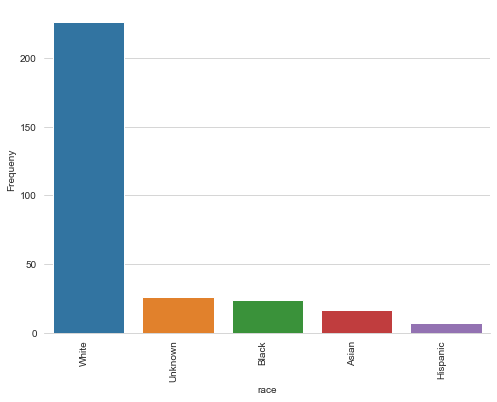

In [5]:
plot_distribution(demo.race.value_counts())

In [6]:
# For sex (not gender)
print(demo.gender.value_counts())
print(demo.gender.value_counts()/demo.gender.value_counts().sum())

Female    176
Male      124
Name: gender, dtype: int64
Female    0.586667
Male      0.413333
Name: gender, dtype: float64


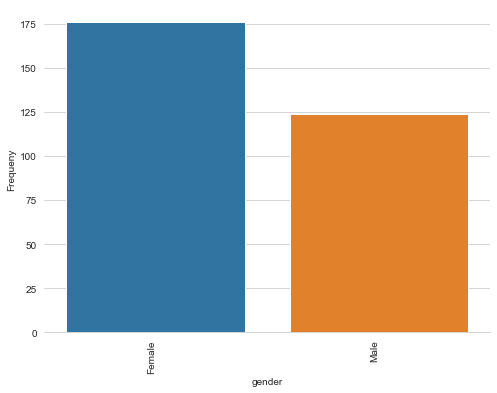

In [7]:
plot_distribution(demo.gender.value_counts())

In [8]:
# Describe the age of the patient population
demo.age.describe()

count    300.000000
mean      70.383333
std        9.247058
min       46.000000
25%       64.000000
50%       71.000000
75%       78.000000
max       86.000000
Name: age, dtype: float64

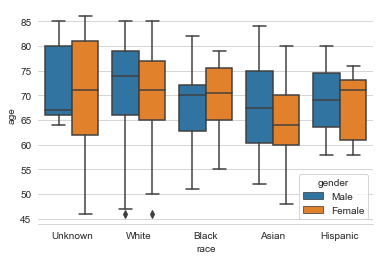

In [9]:
# See age distribution by race and gender
sns.boxplot(x="race", y="age", hue="gender", data=demo)
sns.despine(left=True)

## Explore Stage distribution

In [10]:
print(stage.Stage_Progress.value_counts())
print(stage.Stage_Progress.value_counts()/stage.Stage_Progress.value_counts().sum())

False    200
True     100
Name: Stage_Progress, dtype: int64
False    0.666667
True     0.333333
Name: Stage_Progress, dtype: float64


In [11]:
# Let's explore the stage distribution by sex and race
demo_stage = pd.concat([demo,stage], axis=1)

for i, data in demo_stage.groupby("race"):
    print(i)
    print(data.Stage_Progress.value_counts())
    print(data.Stage_Progress.value_counts()/data.Stage_Progress.value_counts().sum())
    print("-"*30)

Asian
False    12
True      5
Name: Stage_Progress, dtype: int64
False    0.705882
True     0.294118
Name: Stage_Progress, dtype: float64
------------------------------
Black
False    18
True      6
Name: Stage_Progress, dtype: int64
False    0.75
True     0.25
Name: Stage_Progress, dtype: float64
------------------------------
Hispanic
False    4
True     3
Name: Stage_Progress, dtype: int64
False    0.571429
True     0.428571
Name: Stage_Progress, dtype: float64
------------------------------
Unknown
False    16
True     10
Name: Stage_Progress, dtype: int64
False    0.615385
True     0.384615
Name: Stage_Progress, dtype: float64
------------------------------
White
False    150
True      76
Name: Stage_Progress, dtype: int64
False    0.663717
True     0.336283
Name: Stage_Progress, dtype: float64
------------------------------


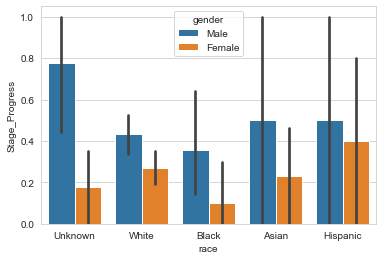

In [12]:
sns.barplot(data=demo_stage, x="race", y="Stage_Progress", hue="gender")
plt.show()

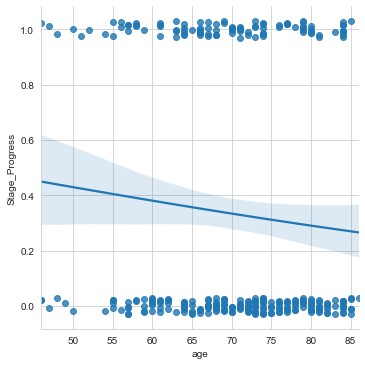

In [13]:
sns.lmplot(x="age", y="Stage_Progress",
           data=pd.concat([demo, stage], axis=1),
           logistic=True, y_jitter=0.03)
plt.show()

## Explore Biomarkers

### Creatinine

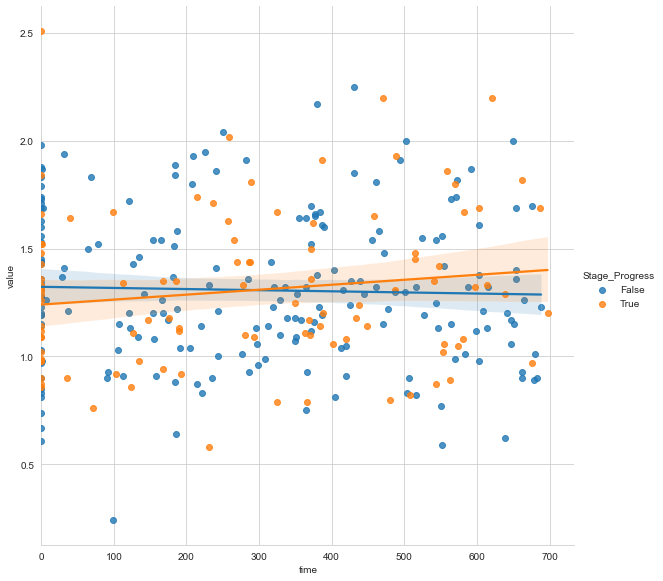

In [14]:
# Show Creatinine
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([cre, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Diastolic Blood Pressure (DBP)

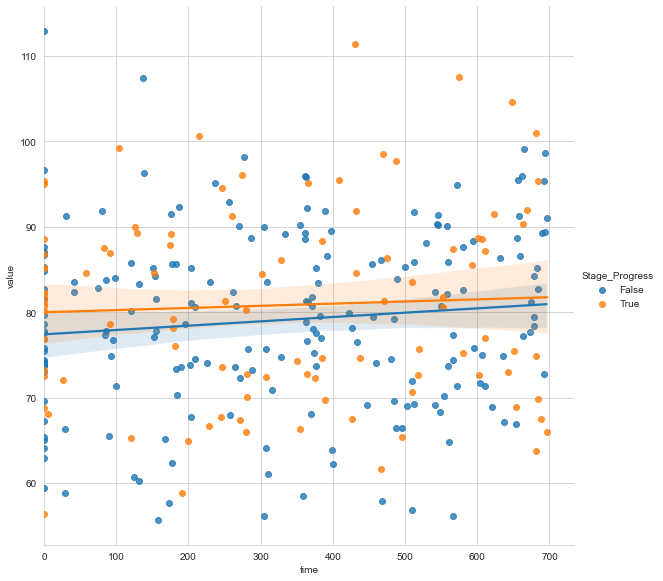

In [15]:
# Show DBP
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([dbp, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Systolic Blood Pressure (SBP)

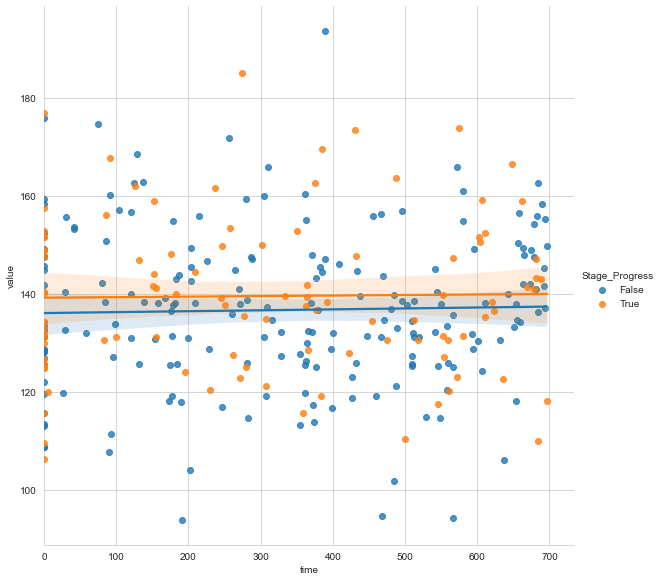

In [16]:
# Show SBP
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([sbp, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Hemoglobin

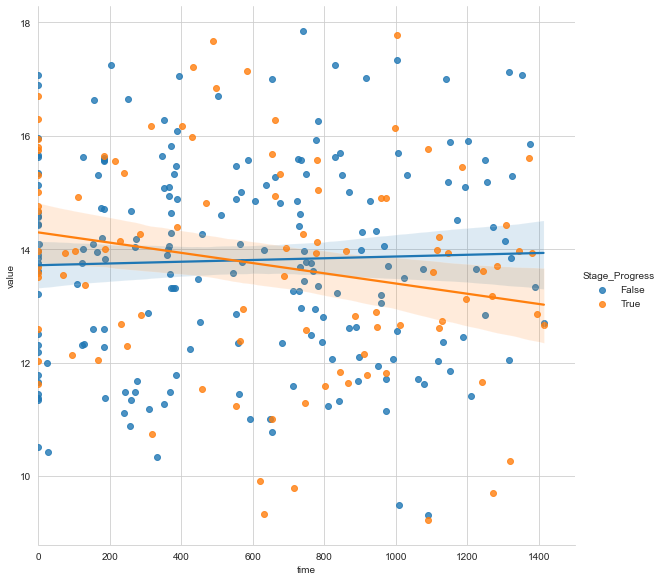

In [17]:
# Show hemoglobin
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([hgb, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Glucose

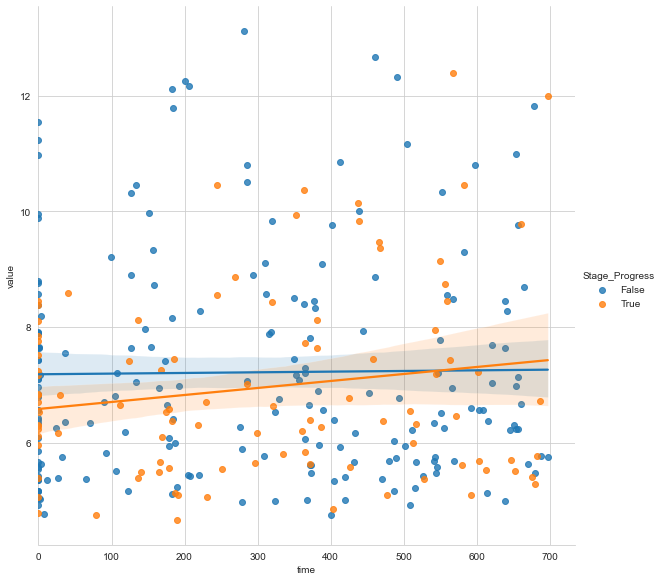

In [18]:
# Show glucose
sns.lmplot(x="time", y="value", hue="Stage_Progress",
              data=pd.concat([glu, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

### Low Density Lipoprotein

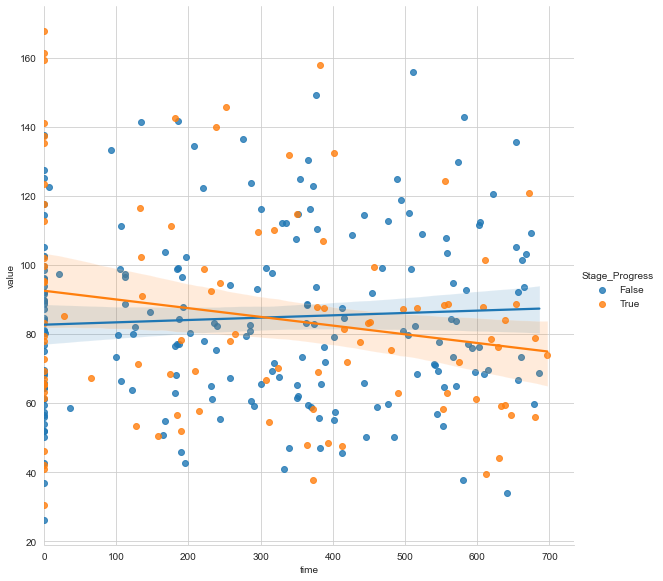

In [19]:
# Show low density lipoproteins
sns.lmplot(x="time", y="value", hue="Stage_Progress", scatter=True,
              data=pd.concat([ldl, stage],axis=1),
              height=8, aspect=1)
sns.despine(left=True)

## Medicines

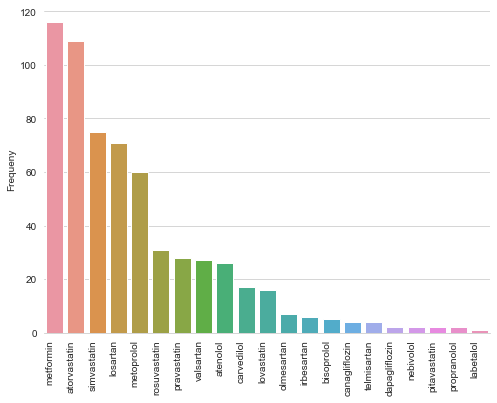

In [20]:
# Get number of patients taken a given drug
drug_count = pd.Series({i:drug.id.unique().shape[0] for i, drug in meds.groupby("drug")})
drug_count = drug_count.sort_values(ascending=False)
plot_distribution(drug_count)

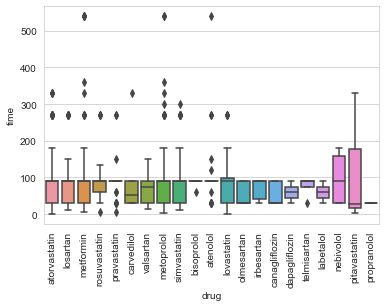

In [21]:
# Explore treatment duration per drug
meds["time"] = meds["end_day"] - meds["start_day"]
ax = sns.boxplot(x="drug", y="time", data=meds[["id", "drug", "time"]].drop_duplicates())
plt.xticks(rotation=90)
plt.show()

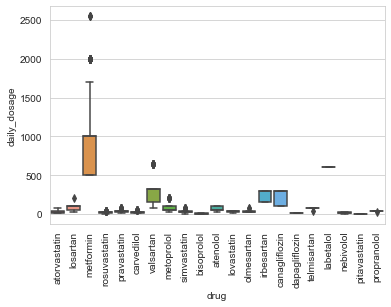

In [22]:
# Explore dosage per drug
sns.boxplot(x="drug", y="daily_dosage", data=meds)
plt.xticks(rotation=90)
plt.show()


In [23]:
# Are all patients taking medication?
print(f"Patients taking medication = {meds.id.unique().shape[0]}")

# How's the outcome of the patients that are not taking medication?
id_nomeds = set(stage.id) - set(meds.id)
stage_nomeds = stage[stage.apply(lambda x: x["id"] in id_nomeds, axis=1)]
print(stage_nomeds.Stage_Progress.value_counts())
print(stage_nomeds.Stage_Progress.value_counts()/stage_nomeds.Stage_Progress.value_counts().sum())

Patients taking medication = 272
False    19
True      9
Name: Stage_Progress, dtype: int64
False    0.678571
True     0.321429
Name: Stage_Progress, dtype: float64


In [24]:
# What about those taking the medication?
stage_meds = stage[~stage.apply(lambda x: x["id"] in id_nomeds, axis=1)]
print(stage_meds.Stage_Progress.value_counts())
print(stage_meds.Stage_Progress.value_counts()/stage_meds.Stage_Progress.value_counts().sum())

False    181
True      91
Name: Stage_Progress, dtype: int64
False    0.665441
True     0.334559
Name: Stage_Progress, dtype: float64


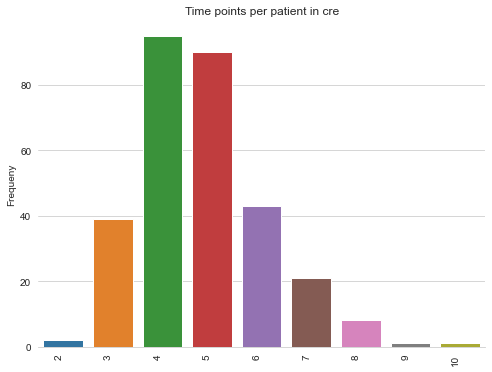

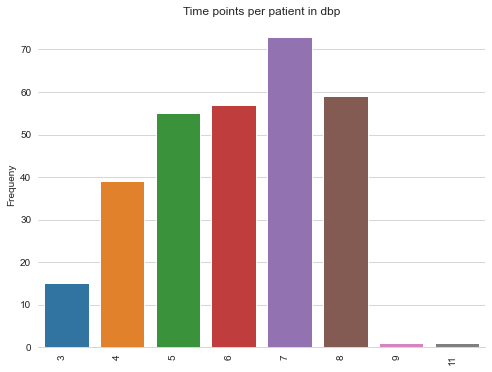

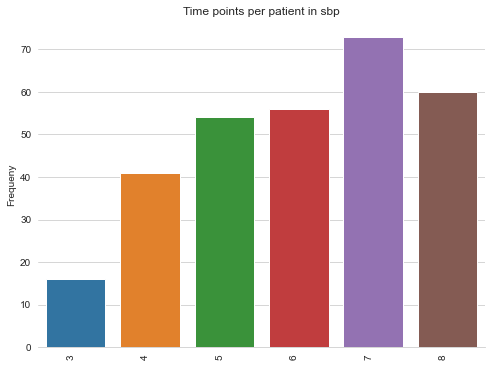

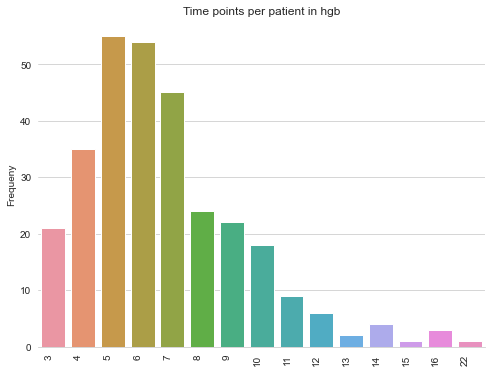

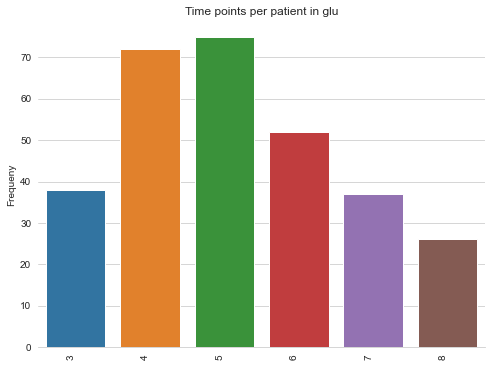

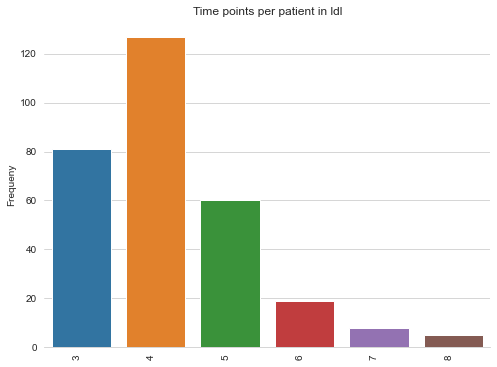

In [26]:
# Check how many time points there are per biomarker
plot_distribution(pd.Series({i:data.shape[0] for i, data in cre.groupby("id")}).value_counts(),
                  title="Time points per patient in cre")
plot_distribution(pd.Series({i:data.shape[0] for i, data in dbp.groupby("id")}).value_counts(),
                  title="Time points per patient in dbp")
plot_distribution(pd.Series({i:data.shape[0] for i, data in sbp.groupby("id")}).value_counts(),
                  title="Time points per patient in sbp")
plot_distribution(pd.Series({i:data.shape[0] for i, data in hgb.groupby("id")}).value_counts(),
                  title="Time points per patient in hgb")
plot_distribution(pd.Series({i:data.shape[0] for i, data in glu.groupby("id")}).value_counts(),
                  title="Time points per patient in glu")
plot_distribution(pd.Series({i:data.shape[0] for i, data in ldl.groupby("id")}).value_counts(),
                  title="Time points per patient in ldl")

## Stage

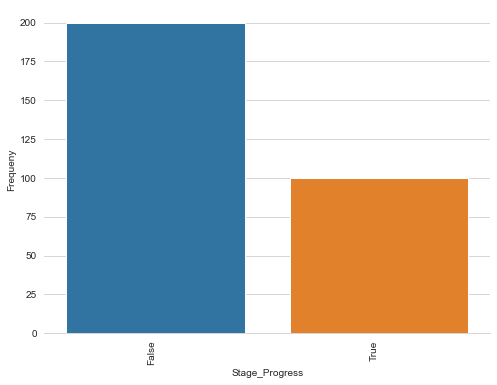

In [30]:
stage.Stage_Progress.value_counts()
plot_distribution(stage.Stage_Progress.value_counts())

,id,value,time
0,0,134.11,0
1,0,133.75,98
2,0,125.08,279
3,0,136.75,380
4,0,130.50,475
...,...,...,...
1804,299,92.70,210
1805,299,125.80,289
1806,299,130.41,372
1807,299,141.68,389
